# The traditional training of Burmese Rice Price Projection Model using Bidirectional Long Short-term Memory Network   
## Expirement 2 - Test Green Way Dataset   
### The target features are h_price, l_price, year, month, date, crop_type_encoded

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_regression
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense, Bidirectional

2024-10-27 13:56:10.263936: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-27 13:56:10.266555: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-27 13:56:10.275571: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-27 13:56:10.291488: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-27 13:56:10.295942: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-27 13:56:10.307765: I tensorflow/core/platform/cpu_feature_gu

In [2]:
gw = pd.read_csv('me/gw.csv')

In [3]:
gw=gw[gw['crop_id'] == 50]
gw.head()

,id,crop_name,crop_location,crop,unit,market,township,price,remark,tab_name,tab_date,created_at,updated_at,township_id,state_id,crop_id,Date
240,452410,ဆန် (ဖျာပုံပေါ်ဆန်းမွှေး),NaN,စပါး,တစ်တင်းခွဲ,ဝါးတန်းလမ်းကုန်စည်ဒိုင်,ရန်ကုန်,၃၃၀၀၀ - ၃၄၅၀၀,ကျပ်,AMIA,1/12/2021,2021-01-12T08:10:32.000000Z,2021-01-12T08:10:32.000000Z,336,13,50,1/12/2021
241,452411,ဆန်(ဒေးဒရဲပေါ်ဆန်းမွှေး),NaN,စပါး,တစ်တင်းခွဲ,ဝါးတန်းလမ်းကုန်စည်ဒိုင်,ရန်ကုန်,၃၃၀၀၀ - ၃၄၅၀၀,ကျပ်,AMIA,1/12/2021,2021-01-12T08:10:32.000000Z,2021-01-12T08:10:32.000000Z,336,13,50,1/12/2021
242,452412,ဆန်(​မြောင်းမြ၊ပုသိမ်ပေါ်ဆန်းမွှေး),NaN,စပါး,တစ်တင်းခွဲ,ဝါးတန်းလမ်းကုန်စည်ဒိုင်,ရန်ကုန်,၃၄၀၀၀ - ၃၆၀၀၀,ကျပ်,AMIA,1/12/2021,2021-01-12T08:10:32.000000Z,2021-01-12T08:10:32.000000Z,336,13,50,1/12/2021
243,452413,ဆန်(ပေါ်ဆန်းနယ်စုံသစ်),NaN,စပါး,တစ်တင်းခွဲ,ဝါးတန်းလမ်းကုန်စည်ဒိုင်,ရန်ကုန်,၃၁၀၀၀ - ၃၂၅၀၀,ကျပ်,AMIA,1/12/2021,2021-01-12T08:10:32.000000Z,2021-01-12T08:10:32.000000Z,336,13,50,1/12/2021
244,452414,ဆန်(ငစိန်),NaN,စပါး,တစ်တင်းခွဲ,ဝါးတန်းလမ်းကုန်စည်ဒိုင်,ရန်ကုန်,၂၁၀၀၀ - ၂၂၅၀၀,ကျပ်,AMIA,1/12/2021,2021-01-12T08:10:32.000000Z,2021-01-12T08:10:32.000000Z,336,13,50,1/12/2021


In [4]:
#check the price column
gw['price'].unique()

array(['၃၃၀၀၀ - ၃၄၅၀၀', '၃၄၀၀၀ - ၃၆၀၀၀', '၃၁၀၀၀ - ၃၂၅၀၀', '၂၁၀၀၀ - ၂၂၅၀၀',
       '၂၆၀၀၀ - ၂၇၀၀၀', '၄၆၀၀၀ - ၅၀၀၀၀', '၂၃၀၀၀ - ၂၄၀၀၀', '၂၈၀၀၀ - ၂၉၅၀၀',
       '၃၄၀၀၀  - ၃၆၀၀၀', '၃၂၀၀၀  - ၃၂၅၀၀', '၃၄၀၀၀ - ၃၅၀၀၀',
       '၃၄၀၀၀ -၃၄၅၀၀', '၃၆၀၀၀ - ၃၉၀၀၀', '၃၇၀၀၀ - ၄၀၀၀၀', '၃၅၀၀၀ - ၃၈၅၀၀',
       '၂၁၅၀၀ - ၂၂၅၀၀', '၃၁၅၀၀ -၃၃၀၀၀', '၄၇၀၀၀ - ၅၀၀၀၀', '၂၂၅၀၀ - ၂၃၀၀၀',
       '၄၀၀၀၀  - ၄၂၀၀၀', '၃၈၀၀၀  - ၃၈၅၀၀', '၄၁၀၀၀ - ၄၂၀၀၀',
       '၃၈၀၀၀ -၄၁၀၀၀', '၃၀၀၀၀ - ၃၂၅၀၀', '၂၄၀၀၀ - ၂၅၅၀၀', '၂၃၀၀၀ - ၂၃၅၀၀',
       '၄၁၀၀၀  - ၄၂၀၀၀', '၃၈၅၀၀  - ၃၉၀၀၀', '၄၁၀၀၀ - ၄၄၀၀၀',
       '၃၂၀၀၀ - ၃၃၀၀၀', '၄၀၀၀၀ -၄၁၀၀၀', '၃၂၀၀၀ - ၃၃၅၀၀', '၄၀၀၀၀  - ၄၁၀၀၀',
       '၂၃၅၀၀ - ၂၄၀၀၀', '၃၈၀၀၀ - ၄၂၀၀၀', '၃၁၀၀၀ - ၃၂၀၀၀', '၃၉၀၀၀ - ၄၁၀၀၀',
       '၃၀၀၀၀ - ၃၂၀၀၀', '၂၅၀၀၀ - ၂၆၀၀၀', '၃၈၀၀၀  - ၃၉၀၀၀',
       '၄၀၀၀၀ - ၄၂၀၀၀', '၃၁၀၀၀ - ၃၃၀၀၀', '၃၈၀၀၀  - ၃၉၅၀၀',
       '၄၀၀၀၀ - ၄၄၀၀၀', '33000', '၃၉၀၀၀ - ၄၀၀၀၀', '၄၂၅၀၀ - ၄၅၀၀၀',
       '၃၄၀၀၀ -၃၅၀၀၀', '၄၇၀၀၀ - ၅၁၀၀၀', '၂၁၀၀၀ - ၂၂၀၀၀', '၂၄၀၀၀ - ၂၅၀၀၀',
       '၄၂၀၀၀  - ၄၃၅၀၀', '၄၄၀၀၀ - ၄၆၀၀၀

In [5]:
#remove whitespaces
gw['price'] = gw['price'].str.replace(' ', ',')
gw['price'] = gw['price'].str.replace(',', '')

In [6]:
gw['price'].unique()

array(['၃၃၀၀၀-၃၄၅၀၀', '၃၄၀၀၀-၃၆၀၀၀', '၃၁၀၀၀-၃၂၅၀၀', '၂၁၀၀၀-၂၂၅၀၀',
       '၂၆၀၀၀-၂၇၀၀၀', '၄၆၀၀၀-၅၀၀၀၀', '၂၃၀၀၀-၂၄၀၀၀', '၂၈၀၀၀-၂၉၅၀၀',
       '၃၂၀၀၀-၃၂၅၀၀', '၃၄၀၀၀-၃၅၀၀၀', '၃၄၀၀၀-၃၄၅၀၀', '၃၆၀၀၀-၃၉၀၀၀',
       '၃၇၀၀၀-၄၀၀၀၀', '၃၅၀၀၀-၃၈၅၀၀', '၂၁၅၀၀-၂၂၅၀၀', '၃၁၅၀၀-၃၃၀၀၀',
       '၄၇၀၀၀-၅၀၀၀၀', '၂၂၅၀၀-၂၃၀၀၀', '၄၀၀၀၀-၄၂၀၀၀', '၃၈၀၀၀-၃၈၅၀၀',
       '၄၁၀၀၀-၄၂၀၀၀', '၃၈၀၀၀-၄၁၀၀၀', '၃၀၀၀၀-၃၂၅၀၀', '၂၄၀၀၀-၂၅၅၀၀',
       '၂၃၀၀၀-၂၃၅၀၀', '၃၈၅၀၀-၃၉၀၀၀', '၄၁၀၀၀-၄၄၀၀၀', '၃၂၀၀၀-၃၃၀၀၀',
       '၄၀၀၀၀-၄၁၀၀၀', '၃၂၀၀၀-၃၃၅၀၀', '၂၃၅၀၀-၂၄၀၀၀', '၃၈၀၀၀-၄၂၀၀၀',
       '၃၁၀၀၀-၃၂၀၀၀', '၃၉၀၀၀-၄၁၀၀၀', '၃၀၀၀၀-၃၂၀၀၀', '၂၅၀၀၀-၂၆၀၀၀',
       '၃၈၀၀၀-၃၉၀၀၀', '၃၁၀၀၀-၃၃၀၀၀', '၃၈၀၀၀-၃၉၅၀၀', '၄၀၀၀၀-၄၄၀၀၀',
       '33000', '၃၉၀၀၀-၄၀၀၀၀', '၄၂၅၀၀-၄၅၀၀၀', '၄၇၀၀၀-၅၁၀၀၀',
       '၂၁၀၀၀-၂၂၀၀၀', '၂၄၀၀၀-၂၅၀၀၀', '၄၂၀၀၀-၄၃၅၀၀', '၄၄၀၀၀-၄၆၀၀၀',
       '၃၅၀၀၀-၃၆၀၀၀', '43000', '34000', '၄၆၀၀၀-၄၇၀၀၀', '၃၆၀၀၀-၃၇၀၀၀',
       '၄၃၅၀၀-၄၄၀၀၀', '၄၁၀၀၀-၄၃၀၀၀', '၃၉၅၀၀-၄၁၀၀၀', '၄၄၀၀၀-၄၇၀၀၀',
       '၂၃၃၀၀-၂၄၀၀၀', '၃၄၅၀၀-၃၆၀၀၀', '၄၇၅၀၀-၅၂၀၀၀', '၄၂၀၀၀-၄၄၅၀၀'

In [7]:
#split into two columns
gw[['h_price', 'l_price']] = gw['price'].str.split('-', n=1, expand=True)
# gw['h_price'] = gw['h_price'].str.replace('-', '')

In [8]:
gw['h_price'].unique()

array(['၃၃၀၀၀', '၃၄၀၀၀', '၃၁၀၀၀', '၂၁၀၀၀', '၂၆၀၀၀', '၄၆၀၀၀', '၂၃၀၀၀',
       '၂၈၀၀၀', '၃၂၀၀၀', '၃၆၀၀၀', '၃၇၀၀၀', '၃၅၀၀၀', '၂၁၅၀၀', '၃၁၅၀၀',
       '၄၇၀၀၀', '၂၂၅၀၀', '၄၀၀၀၀', '၃၈၀၀၀', '၄၁၀၀၀', '၃၀၀၀၀', '၂၄၀၀၀',
       '၃၈၅၀၀', '၂၃၅၀၀', '၃၉၀၀၀', '၂၅၀၀၀', '33000', '၄၂၅၀၀', '၄၂၀၀၀',
       '၄၄၀၀၀', '43000', '34000', '၄၃၅၀၀', '၃၉၅၀၀', '၂၃၃၀၀', '၃၄၅၀၀',
       '၄၇၅၀၀', '၄၅၀၀၀', '၄၁၅၀၀', '၄၈၅၀၀', '၄၈၀၀၀', '၂၂၃၀၀', '၄၃၀၀၀',
       '၃၇၅၀၀', '၄၉၀၀၀', '၂၄၅၀၀', '၂၅၅၀၀', '၅၂၀၀၀', '၂၇၀၀၀', '40000',
       '၅၀၀၀၀', '၂၂၀၀၀', '၂၂၈၀၀', '37000', '၂၅၃၀၀', '၅၃၀၀၀', '38000',
       '31000', '၂၉၀၀၀', '၃၆၅၀၀', '၂၃၈၀၀', '၂၆၅၀၀', '၃၅၅၀၀', '28000',
       '27000', '၂၈၅၀၀', '၅၅၀၀၀', '30500', '၂၆၂၀၀', '၃၃၅၀၀', '၂၉၅၀၀',
       '၂၇၅၀၀', '35000', '၅၁၀၀၀', '၅၇၀၀၀', '၅၁၅၀၀', '၂၈၇၀၀', '၃၀၅၀၀',
       '၃၁၈၀၀', '၄၀၅၀၀', '၅၄၀၀၀', '၆၀၀၀၀', '၃၁၂၀၀', '၇၀၀၀၀', '၇၃၀၀၀',
       '၅၆၀၀၀', '၅၈၀၀၀', '၆၅၀၀၀', '၃၂၅၀၀', '၇၈၀၀၀', '၆၂၀၀၀', '၅၉၀၀၀',
       '၆၃၀၀၀', '၆၁၀၀၀', '၆၈၀၀၀', '၈၃၀၀၀', '၆၀၅၀၀', '၄၆၅၀၀', '၅၂၅၀၀',
       '၆၂၅၀၀', '၈၀၀

In [9]:
#fill null value of low price with h_rpice
gw['l_price'] = np.where(gw['l_price'].notnull(), gw['l_price'], gw['h_price'])

In [10]:
gw['h_price'].unique()

array(['၃၃၀၀၀', '၃၄၀၀၀', '၃၁၀၀၀', '၂၁၀၀၀', '၂၆၀၀၀', '၄၆၀၀၀', '၂၃၀၀၀',
       '၂၈၀၀၀', '၃၂၀၀၀', '၃၆၀၀၀', '၃၇၀၀၀', '၃၅၀၀၀', '၂၁၅၀၀', '၃၁၅၀၀',
       '၄၇၀၀၀', '၂၂၅၀၀', '၄၀၀၀၀', '၃၈၀၀၀', '၄၁၀၀၀', '၃၀၀၀၀', '၂၄၀၀၀',
       '၃၈၅၀၀', '၂၃၅၀၀', '၃၉၀၀၀', '၂၅၀၀၀', '33000', '၄၂၅၀၀', '၄၂၀၀၀',
       '၄၄၀၀၀', '43000', '34000', '၄၃၅၀၀', '၃၉၅၀၀', '၂၃၃၀၀', '၃၄၅၀၀',
       '၄၇၅၀၀', '၄၅၀၀၀', '၄၁၅၀၀', '၄၈၅၀၀', '၄၈၀၀၀', '၂၂၃၀၀', '၄၃၀၀၀',
       '၃၇၅၀၀', '၄၉၀၀၀', '၂၄၅၀၀', '၂၅၅၀၀', '၅၂၀၀၀', '၂၇၀၀၀', '40000',
       '၅၀၀၀၀', '၂၂၀၀၀', '၂၂၈၀၀', '37000', '၂၅၃၀၀', '၅၃၀၀၀', '38000',
       '31000', '၂၉၀၀၀', '၃၆၅၀၀', '၂၃၈၀၀', '၂၆၅၀၀', '၃၅၅၀၀', '28000',
       '27000', '၂၈၅၀၀', '၅၅၀၀၀', '30500', '၂၆၂၀၀', '၃၃၅၀၀', '၂၉၅၀၀',
       '၂၇၅၀၀', '35000', '၅၁၀၀၀', '၅၇၀၀၀', '၅၁၅၀၀', '၂၈၇၀၀', '၃၀၅၀၀',
       '၃၁၈၀၀', '၄၀၅၀၀', '၅၄၀၀၀', '၆၀၀၀၀', '၃၁၂၀၀', '၇၀၀၀၀', '၇၃၀၀၀',
       '၅၆၀၀၀', '၅၈၀၀၀', '၆၅၀၀၀', '၃၂၅၀၀', '၇၈၀၀၀', '၆၂၀၀၀', '၅၉၀၀၀',
       '၆၃၀၀၀', '၆၁၀၀၀', '၆၈၀၀၀', '၈၃၀၀၀', '၆၀၅၀၀', '၄၆၅၀၀', '၅၂၅၀၀',
       '၆၂၅၀၀', '၈၀၀

In [11]:
gw['l_price'].unique()

array(['၃၄၅၀၀', '၃၆၀၀၀', '၃၂၅၀၀', '၂၂၅၀၀', '၂၇၀၀၀', '၅၀၀၀၀', '၂၄၀၀၀',
       '၂၉၅၀၀', '၃၅၀၀၀', '၃၉၀၀၀', '၄၀၀၀၀', '၃၈၅၀၀', '၃၃၀၀၀', '၂၃၀၀၀',
       '၄၂၀၀၀', '၄၁၀၀၀', '၂၅၅၀၀', '၂၃၅၀၀', '၄၄၀၀၀', '၃၃၅၀၀', '၃၂၀၀၀',
       '၂၆၀၀၀', '၃၉၅၀၀', '33000', '၄၅၀၀၀', '၅၁၀၀၀', '၂၂၀၀၀', '၂၅၀၀၀',
       '၄၃၅၀၀', '၄၆၀၀၀', '43000', '34000', '၄၇၀၀၀', '၃၇၀၀၀', '၄၃၀၀၀',
       '၅၂၀၀၀', '၄၄၅၀၀', '၃၈၀၀၀', '၅၃၀၀၀', '၂၇၅၀၀', '၄၈၀၀၀', '၄၆၅၀၀',
       '၅၄၀၀၀', '၂၂၈၀၀', '၄၇၅၀၀', '၄၀၅၀၀', '၂၈၅၀၀', '၄၉၀၀၀', '၂၆၅၀၀',
       '၅၉၀၀၀', '၂၄၅၀၀', '၂၉၀၀၀', '40000', '၄၅၅၀၀', '၃၀၀၀၀', '37000',
       '၆၀၀၀၀', '38000', '၄၁၅၀၀', '31000', '၃၆၅၀၀', '28000', '၃၈၀၀',
       '27000', '30500', '၃၁၀၀၀', '၃၄၀၀၀', '၅၉၅၀၀', '၃၁၅၀၀', '၂၈၀၀၀',
       '35000', '၆၃၀၀၀', '၅၅၀၀၀', '၃၀၅၀၀', '4၁၀၀၀', '၄၈၅၀၀', '၄၉၅၀၀',
       '၃၄၅၀', '၄၂၅၀၀', '၆၆၀၀၀', '၅၆၀၀၀', '၇၀၀၀၀', '၇၆၀၀၀', '၅၈၀၀၀',
       '၈၀၀၀၀', '၆၁၀၀၀', '၅၇၀၀၀', '၈၇၀၀၀', '၆၇၀၀၀', '၆၈၀၀၀', '၃၅၅၀၀',
       '၉၀၀၀၀', '၃၇၅၀၀', '၆၅၀၀၀', '၉၁၀၀၀', '၇၃၀၀၀', '၇၂၀၀၀', '၇၁၀၀၀',
       '၅၃၅၀၀', '၉၃၀၀၀

In [12]:
# Define the convert_myanmar_numbers function
def convert_myanmar_numbers(text):
    """
    Convert Myanmar numbers to English numbers
    """
    mapping = {
        '\u1040': '0',  # ၀
        '\u1041': '1',  # ၁
        '\u1042': '2',  # ၂
        '\u1043': '3',  # ၃
        '\u1044': '4',  # ၄
        '\u1045': '5',  # ၅
        '\u1046': '6',  # ၆
        '\u1047': '7',  # ၇
        '\u1048': '8',  # ၈
        '\u1049': '9',  # ၉
    }
    return ''.join(mapping.get(c, c) for c in text)

In [13]:
gw['h_price'] = gw['h_price'].apply(convert_myanmar_numbers)
gw['l_price'] = gw['l_price'].apply(convert_myanmar_numbers)

In [14]:
gw['h_price'].unique()

array(['33000', '34000', '31000', '21000', '26000', '46000', '23000',
       '28000', '32000', '36000', '37000', '35000', '21500', '31500',
       '47000', '22500', '40000', '38000', '41000', '30000', '24000',
       '38500', '23500', '39000', '25000', '42500', '42000', '44000',
       '43000', '43500', '39500', '23300', '34500', '47500', '45000',
       '41500', '48500', '48000', '22300', '37500', '49000', '24500',
       '25500', '52000', '27000', '50000', '22000', '22800', '25300',
       '53000', '29000', '36500', '23800', '26500', '35500', '28500',
       '55000', '30500', '26200', '33500', '29500', '27500', '51000',
       '57000', '51500', '28700', '31800', '40500', '54000', '60000',
       '31200', '70000', '73000', '56000', '58000', '65000', '32500',
       '78000', '62000', '59000', '63000', '61000', '68000', '83000',
       '60500', '46500', '52500', '62500', '80000', '66000', '85000',
       '87000', '90000', '67000', '64000', '72000', '44500', '45500',
       '74000', '710

In [15]:
gw['l_price'].unique()

array(['34500', '36000', '32500', '22500', '27000', '50000', '24000',
       '29500', '35000', '39000', '40000', '38500', '33000', '23000',
       '42000', '41000', '25500', '23500', '44000', '33500', '32000',
       '26000', '39500', '45000', '51000', '22000', '25000', '43500',
       '46000', '43000', '34000', '47000', '37000', '52000', '44500',
       '38000', '53000', '27500', '48000', '46500', '54000', '22800',
       '47500', '40500', '28500', '49000', '26500', '59000', '24500',
       '29000', '45500', '30000', '60000', '41500', '31000', '36500',
       '28000', '3800', '30500', '59500', '31500', '63000', '55000',
       '48500', '49500', '3450', '42500', '66000', '56000', '70000',
       '76000', '58000', '80000', '61000', '57000', '87000', '67000',
       '68000', '35500', '90000', '37500', '65000', '91000', '73000',
       '72000', '71000', '53500', '93000', '62000', '6800', '64500',
       '54500', '62300', '95000', '97000', '98000', '75000', '68500',
       '69000', '64000'

In [16]:
#check all column data types with sample values
for col in gw.columns:
    print(col)
    print(gw[col].unique()[:5])
    print(gw[col].nunique())
    print()

id
[452410 452411 452412 452413 452414]
11217

crop_name
['ဆန် (ဖျာပုံပေါ်ဆန်းမွှေး)' 'ဆန်(ဒေးဒရဲပေါ်ဆန်းမွှေး) '
 'ဆန်(\u200bမြောင်းမြ၊ပုသိမ်ပေါ်ဆန်းမွှေး)' 'ဆန်(ပေါ်ဆန်းနယ်စုံသစ်) '
 'ဆန်(ငစိန်)']
35

crop_location
[nan]
0

crop
['စပါး']
1

unit
['တစ်တင်းခွဲ' 'တစ်တင်းခွဲ ']
2

market
['ဝါးတန်းလမ်းကုန်စည်ဒိုင်' 'ဝါးတ+K12:K13န်းလမ်းကုန်စည်ဒိုင်']
2

township
['ရန်ကုန်']
1

price
['၃၃၀၀၀-၃၄၅၀၀' '၃၄၀၀၀-၃၆၀၀၀' '၃၁၀၀၀-၃၂၅၀၀' '၂၁၀၀၀-၂၂၅၀၀' '၂၆၀၀၀-၂၇၀၀၀']
468

remark
['ကျပ်']
1

tab_name
['AMIA']
1

tab_date
['1/12/2021' '1/20/2021' '2/5/2021' '5/11/2021' '5/12/2021']
743

created_at
['2021-01-12T08:10:32.000000Z' '2021-01-20T08:51:43.000000Z'
 '2021-02-05T09:35:38.000000Z' '2021-02-05T09:35:39.000000Z'
 '2021-05-12T06:25:39.000000Z']
1655

updated_at
['2021-01-12T08:10:32.000000Z' '2021-01-20T08:51:43.000000Z'
 '2021-02-05T09:35:38.000000Z' '2021-02-05T09:35:39.000000Z'
 '2021-05-12T06:25:39.000000Z']
1655

township_id
[336]
1

state_id
[13]
1

crop_id
[50]
1

Date
['1/12/2021' '1/20/2021' 

In [17]:
# Encode crop names as integers
label_encoder = LabelEncoder()
gw['crop_name_encoded'] = label_encoder.fit_transform(gw['crop_name'])
gw['market_name_encoded'] = label_encoder.fit_transform(gw['market'])

# Pass 'crop_name_encoded' into an embedding layer in your model architecture

In [18]:
# convert the string column to datetime
gw['created_at'] = pd.to_datetime(gw['created_at'])

# extract year, month, day, hour, minute, and second
gw['year'] = gw['created_at'].dt.year
gw['month'] = gw['created_at'].dt.month
gw['day'] = gw['created_at'].dt.day
gw['hour'] = gw['created_at'].dt.hour
gw['minute'] = gw['created_at'].dt.minute
gw['second'] = gw['created_at'].dt.second
gw.head()

,id,crop_name,crop_location,crop,unit,market,township,price,remark,tab_name,...,h_price,l_price,crop_name_encoded,market_name_encoded,year,month,day,hour,minute,second
240,452410,ဆန် (ဖျာပုံပေါ်ဆန်းမွှေး),NaN,စပါး,တစ်တင်းခွဲ,ဝါးတန်းလမ်းကုန်စည်ဒိုင်,ရန်ကုန်,၃၃၀၀၀-၃၄၅၀၀,ကျပ်,AMIA,...,33000,34500,2,1,2021,1,12,8,10,32
241,452411,ဆန်(ဒေးဒရဲပေါ်ဆန်းမွှေး),NaN,စပါး,တစ်တင်းခွဲ,ဝါးတန်းလမ်းကုန်စည်ဒိုင်,ရန်ကုန်,၃၃၀၀၀-၃၄၅၀၀,ကျပ်,AMIA,...,33000,34500,7,1,2021,1,12,8,10,32
242,452412,ဆန်(​မြောင်းမြ၊ပုသိမ်ပေါ်ဆန်းမွှေး),NaN,စပါး,တစ်တင်းခွဲ,ဝါးတန်းလမ်းကုန်စည်ဒိုင်,ရန်ကုန်,၃၄၀၀၀-၃၆၀၀၀,ကျပ်,AMIA,...,34000,36000,23,1,2021,1,12,8,10,32
243,452413,ဆန်(ပေါ်ဆန်းနယ်စုံသစ်),NaN,စပါး,တစ်တင်းခွဲ,ဝါးတန်းလမ်းကုန်စည်ဒိုင်,ရန်ကုန်,၃၁၀၀၀-၃၂၅၀၀,ကျပ်,AMIA,...,31000,32500,9,1,2021,1,12,8,10,32
244,452414,ဆန်(ငစိန်),NaN,စပါး,တစ်တင်းခွဲ,ဝါးတန်းလမ်းကုန်စည်ဒိုင်,ရန်ကုန်,၂၁၀၀၀-၂၂၅၀၀,ကျပ်,AMIA,...,21000,22500,5,1,2021,1,12,8,10,32


In [19]:
gw['h_price'] = pd.to_numeric(gw['h_price'], errors='coerce')
gw['l_price'] = pd.to_numeric(gw['l_price'], errors='coerce')

In [20]:
gw.dtypes[gw.dtypes == 'object']

crop_name        object
crop_location    object
crop             object
unit             object
market           object
township         object
price            object
remark           object
tab_name         object
tab_date         object
updated_at       object
Date             object
dtype: object

In [21]:
gw.dtypes

id                                   int64
crop_name                           object
crop_location                       object
crop                                object
unit                                object
market                              object
township                            object
price                               object
remark                              object
tab_name                            object
tab_date                            object
created_at             datetime64[ns, UTC]
updated_at                          object
township_id                          int64
state_id                             int64
crop_id                              int64
Date                                object
h_price                              int64
l_price                              int64
crop_name_encoded                    int64
market_name_encoded                  int64
year                                 int32
month                                int32
day        

In [22]:
gw.to_csv('me/gw_new.csv', index=False)

In [23]:
gw.crop_name_encoded.unique()

array([ 2,  7, 23,  9,  5, 11, 14, 19, 13,  0, 33, 25, 27, 18, 31, 29, 21,
       17,  3,  8, 24, 10, 22,  6, 12, 15, 20, 16,  1, 34, 26, 30, 28, 32,
        4])

<Axes: xlabel='crop_name_encoded', ylabel='Count'>

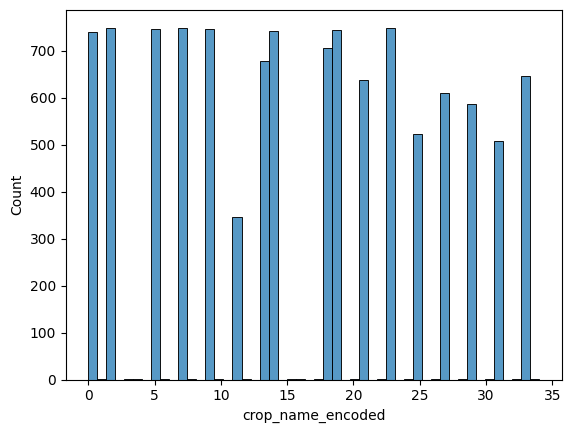

In [24]:
sns.histplot(gw.crop_name_encoded, bins=50)

In [25]:
gw.h_price.max()

146000

<Axes: xlabel='h_price', ylabel='Count'>

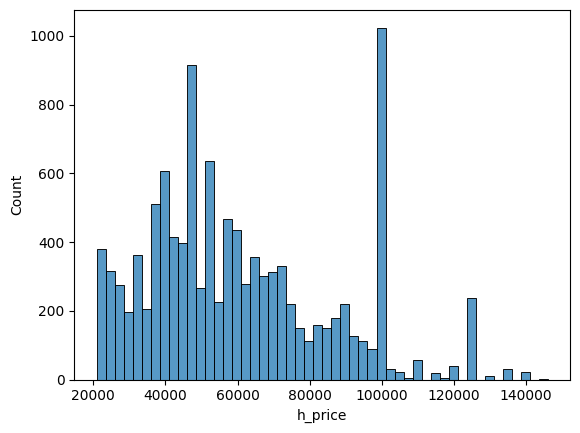

In [26]:
sns.histplot(gw.h_price[gw.h_price <= gw.h_price.max()], bins=50)

In [27]:
gw.l_price.max()

163000

<Axes: xlabel='l_price', ylabel='Count'>

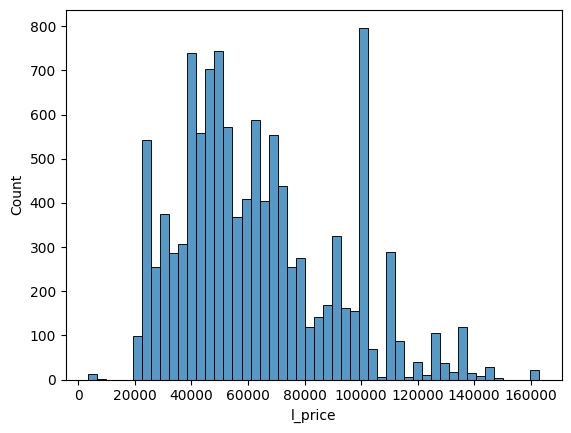

In [28]:
sns.histplot(gw.l_price[gw.l_price <= gw.l_price.max()], bins=50)

<Axes: xlabel='day', ylabel='Count'>

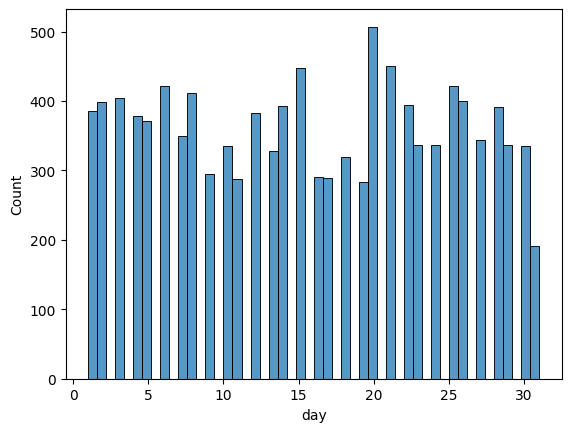

In [29]:
sns.histplot(gw.day, bins=50)

In [30]:
gw['crop_name_encoded'].unique()

array([ 2,  7, 23,  9,  5, 11, 14, 19, 13,  0, 33, 25, 27, 18, 31, 29, 21,
       17,  3,  8, 24, 10, 22,  6, 12, 15, 20, 16,  1, 34, 26, 30, 28, 32,
        4])

In [31]:
gw['crop_name'].unique()

array(['ဆန် (ဖျာပုံပေါ်ဆန်းမွှေး)', 'ဆန်(ဒေးဒရဲပေါ်ဆန်းမွှေး) ',
       'ဆန်(\u200bမြောင်းမြ၊ပုသိမ်ပေါ်ဆန်းမွှေး)',
       'ဆန်(ပေါ်ဆန်းနယ်စုံသစ်) ', 'ဆန်(ငစိန်)', 'ဆန်(မြီးဒုံး)',
       'ဆန်(ရွှေဘိုပေါ်ဆန်း)', 'ဆန်(ဧည့်မထ ၂၅%)', 'ဆန်(ရက် ၉၀ သစ်ရှယ်)',
       'ကြားပျံရှယ်', 'ပေါ်ဆန်းရှယ်', 'တောင်ပျံ(ဖျာပုံ)',
       'တောင်ပျံ(မော်ကျွန်း)', 'ဆန်(သီးထပ်ရှယ်)', 'ပေါ်ကျွဲ(မော်ကျွန်း)',
       'ပေါ်ကျွဲ(ဖျာပုံ)', 'ဆန်(ဧည့်မထ)', 'ဆန်(သီးထပ်)(ဟောင်း)',
       'ဆန် (ဖျာပုံပေါ်ဆန်းမွှေး)(သ)', 'ဆန်(ဒေးဒရဲပေါ်ဆန်းမွှေး) (သ)',
       'ဆန်(\u200bမြောင်းမြ၊ပုသိမ်ပေါ်ဆန်းမွှေး)(သ)',
       'ဆန်(ပေါ်ဆန်းနယ်စုံသစ်) (သ)', 'ဆန်(ဧည့်မထ)(သ)', 'ဆန်(ငစိန်)(သစ်)',
       'ဆန်(မြီးဒုံး)(သစ်)', 'ဆန်(ရွှေဘိုပေါ်ဆန်း) (သစ်)',
       'ဆန်(ဧည့်မထ ၂၅%)(သစ်)', 'ဆန်(သီးထပ်)(သ)', 'ကြားပျံရှယ်(သစ်)',
       'ပေါ်ဆန်းရှယ်(သ)', 'တောင်ပျံ(ဖျာပုံ)(သစ်)',
       'ပေါ်ကျွဲ(ဖျာပုံ)(သစ်)', 'တောင်ပျံ(မော်ကျွန်း)(သစ်)',
       'ပေါ်ကျွဲ(မော်ကျွန်း)(သ)', 'ဆန်('], dtype=object)

In [32]:
crop_name_count = gw['crop_name_encoded'].value_counts()
print(crop_name_count)

crop_name_encoded
2     749
7     749
23    748
9     745
5     745
19    744
14    741
0     739
18    705
13    678
33    647
21    637
27    609
29    586
25    523
31    508
11    346
20      1
32      1
28      1
30      1
26      1
34      1
1       1
16      1
17      1
15      1
12      1
6       1
22      1
10      1
24      1
8       1
3       1
4       1
Name: count, dtype: int64


/tmp/ipykernel_48581/2977480718.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=crop_name_count.index, y=crop_name_count.values, palette="Blues_d")  # Create the bar plot


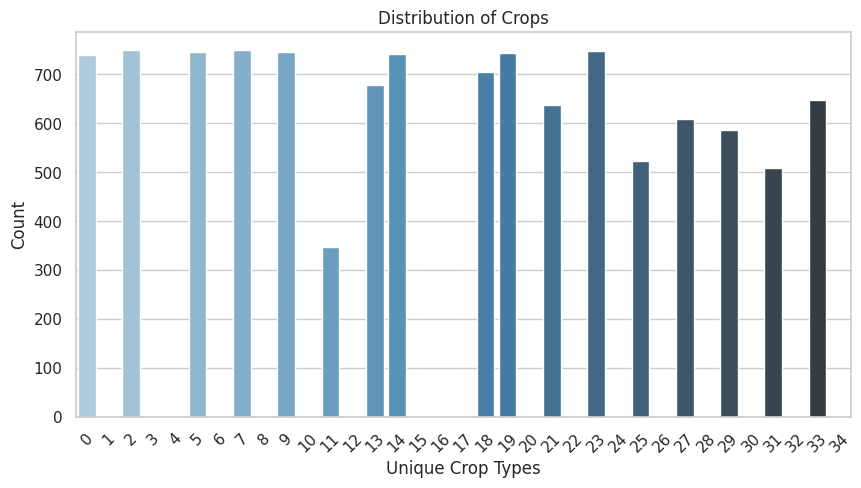

In [33]:
sns.set(style="whitegrid")  # Set a plot style
plt.figure(figsize=(10, 5))  # Set the figure size
sns.barplot(x=crop_name_count.index, y=crop_name_count.values, palette="Blues_d")  # Create the bar plot
plt.title("Distribution of Crops")
plt.xlabel("Unique Crop Types")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

In [ ]:
# market_name_count = gw['market_name_encoded'].value_counts()
# print(market_name_count)

# sns.set(style="whitegrid")  # Set a plot style
# plt.figure(figsize=(10, 5))  # Set the figure size
# sns.barplot(x=market_name_count.index, y=market_name_count.values, palette="Blues_d")  # Create the bar plot
# plt.title("Distribution of Crops")
# plt.xlabel("Unique market name")
# plt.ylabel("Count")
# plt.xticks(rotation=45)
# plt.show()

Text(0.5, 1.0, 'Correlation Matrix')

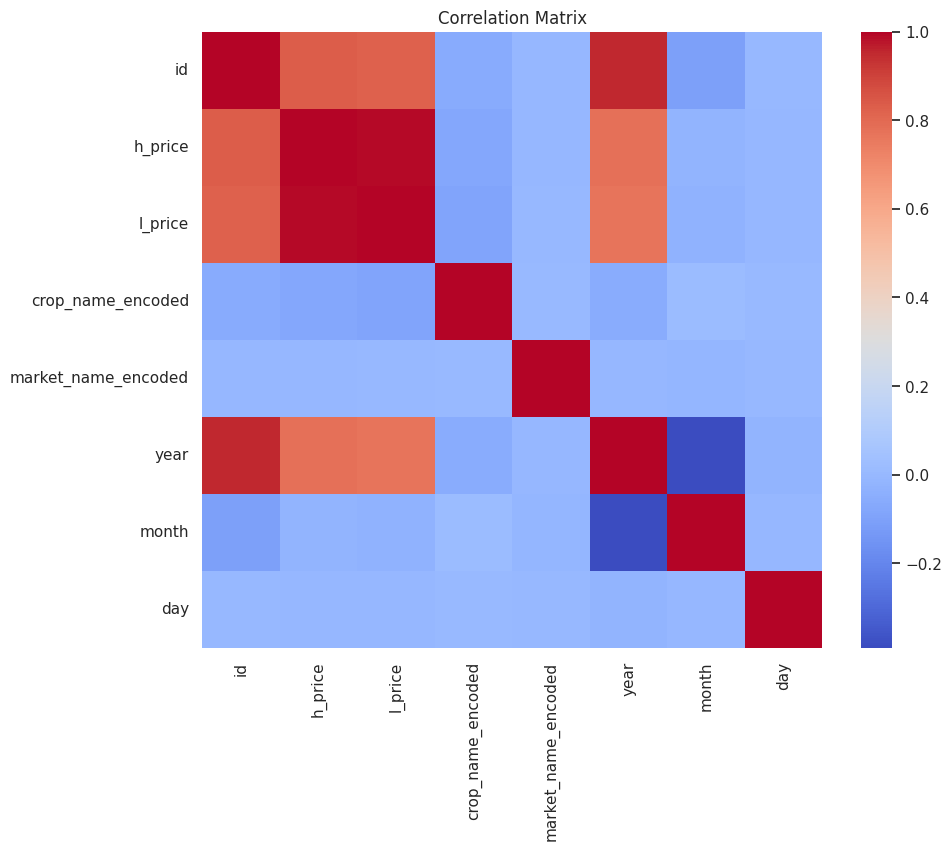

In [34]:
data = gw[['id', 'h_price', 'l_price', 'crop_name_encoded', 'market_name_encoded', 'year', 'month', 'day']]
# Calculate the correlation matrix
correlation_matrix = data.corr()

# Create a heatmap to visualize correlations
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix')

In [35]:
data.to_csv('me/gw_clean.csv', index=False)

In [2]:
data = pd.read_csv('me/gw_clean.csv')
df = pd.read_csv('me/gw_clean.csv')
gw = pd.read_csv('me/gw_clean.csv')
data.isnull().sum()

id                     0
h_price                0
l_price                0
crop_name_encoded      0
market_name_encoded    0
year                   0
month                  0
day                    0
dtype: int64

In [3]:
data.head()

,id,h_price,l_price,crop_name_encoded,market_name_encoded,year,month,day
0,452410,33000,34500,2,1,2021,1,12
1,452411,33000,34500,7,1,2021,1,12
2,452412,34000,36000,23,1,2021,1,12
3,452413,31000,32500,9,1,2021,1,12
4,452414,21000,22500,5,1,2021,1,12


In [4]:
df.shape

(11217, 8)

In [39]:
data.dtypes

id                     int64
h_price                int64
l_price                int64
crop_name_encoded      int64
market_name_encoded    int64
year                   int64
month                  int64
day                    int64
dtype: object

In [40]:
# Define the function
def compute_mutual_information(data, feature_columns, target_columns):
    """
    Computes mutual information between given features and target columns.

    Parameters:
    data (pd.DataFrame): The input dataframe containing the data.
    feature_columns (list): The list of feature column names to calculate mutual information for.
    target_columns (list): The list of target column names ('h_price', 'l_price').

    Returns:
    pd.DataFrame: A dataframe showing mutual information between features and each target.
    """
    
    # Step 1: Extract features and target variables
    X = data[feature_columns]  # Feature matrix
    y_h_price = data[target_columns[0]]  # First target: h_price
    y_l_price = data[target_columns[1]]  # Second target: l_price

    # Step 2: Compute mutual information for h_price
    mutual_info_h_price = mutual_info_regression(X, y_h_price)

    # Step 3: Compute mutual information for l_price
    mutual_info_l_price = mutual_info_regression(X, y_l_price)

    # Step 4: Create and return DataFrame to display results
    mi_df = pd.DataFrame({
        'Feature': feature_columns,
        'Mutual Information (h_price)': mutual_info_h_price,
        'Mutual Information (l_price)': mutual_info_l_price
    })

    # Sort by the highest mutual information for `h_price`
    mi_df = mi_df.sort_values(by='Mutual Information (h_price)', ascending=False)

    return mi_df

# Example usage
data = gw[['id', 'h_price', 'l_price', 'crop_name_encoded', 'market_name_encoded', 'year', 'month', 'day']]

# Specify feature columns and target columns
feature_columns = ['crop_name_encoded', 'market_name_encoded', 'year', 'month', 'day']
target_columns = ['h_price', 'l_price']

# Call the function to compute mutual information
mi_result = compute_mutual_information(data, feature_columns, target_columns)

# Display the result
mi_result.head

<bound method NDFrame.head of                Feature  Mutual Information (h_price)  \
0    crop_name_encoded                      1.175181   
2                 year                      0.686433   
3                month                      0.578624   
4                  day                      0.006280   
1  market_name_encoded                      0.000000   

   Mutual Information (l_price)  
0                      1.165161  
2                      0.687323  
3                      0.646951  
4                      0.008209  
1                      0.000000  >

In [41]:
n = len(data)
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

In [ ]:
# n, n_val + n_test + n_train

In [ ]:
# n_val , n_test , n_train

In [42]:
#shuffel dataset
data.iloc[[10, 0, 3, 5]]

,id,h_price,l_price,crop_name_encoded,market_name_encoded,year,month,day
10,452420,32000,32500,33,1,2021,1,12
0,452410,33000,34500,2,1,2021,1,12
3,452413,31000,32500,9,1,2021,1,12
5,452415,26000,27000,11,1,2021,1,12


In [43]:
data_val = data.iloc[:n_val]
data_test = data.iloc[n_val:n_val+n_test]
data_train = data.iloc[n_val+n_test:]

In [44]:
#shuffel dataset
s_train = data.iloc[n_train:]
s_val = data.iloc[n_train:n_train+n_val]
s_test = data.iloc[n_train+n_val:]

In [45]:
idx = np.arange(n)

In [46]:
np.random.seed(2)
np.random.shuffle(idx)

In [47]:
data.iloc[idx[:10]]

,id,h_price,l_price,crop_name_encoded,market_name_encoded,year,month,day
1628,493491,45000,47000,33,1,2021,11,3
2570,509752,41000,42000,25,1,2022,2,9
7821,600240,60000,62500,21,1,2023,6,13
6784,581367,70000,73000,2,1,2023,3,1
2517,508984,23000,24000,5,1,2022,2,3
8346,609808,93000,95000,7,1,2023,8,2
3457,525890,49000,50000,33,1,2022,5,10
2995,517804,29000,30000,18,1,2022,3,22
9364,630154,100000,100000,0,1,2023,11,7
4800,546758,45000,48000,13,1,2022,9,1


In [55]:
#idx[n_train:] use for train dataset
s_train = data.iloc[idx[:n_train]]
s_val = data.iloc[idx[n_train:n_train+n_val]]
s_test = data.iloc[idx[n_train+n_val:]]

In [56]:
s_train.head()

,id,h_price,l_price,crop_name_encoded,market_name_encoded,year,month,day
1628,493491,45000,47000,33,1,2021,11,3
2570,509752,41000,42000,25,1,2022,2,9
7821,600240,60000,62500,21,1,2023,6,13
6784,581367,70000,73000,2,1,2023,3,1
2517,508984,23000,24000,5,1,2022,2,3


In [57]:
len(s_train), len(s_val), len(s_test)

(6731, 2243, 2243)

In [58]:
s_train = s_train.reset_index(drop=True)
s_val = s_val.reset_index(drop=True)
s_test = s_test.reset_index(drop=True)

In [52]:
y_train = np.log1p(s_train.h_price.values)
y_val = np.log1p(s_val.h_price.values)
y_test = np.log1p(s_test.h_price.values)

In [53]:
# del s_train['h_price']
# del s_val['h_price']
# del s_test['h_price']

In [ ]:
#Linear Regression Model Training

In [ ]:
# data_train.iloc[10]

In [ ]:
# xi = [58000, 66000, 2022]

In [ ]:
# w0 = 7.17
# w = [0.01, 0.04, 0.002]

In [ ]:
# def linear_regression(xi):
#     n = len(xi)
    
#     pred = w0
    
#     for j in range(n):
#         pred = pred + w[j] * xi[j]
        
#     return pred

In [ ]:
# linear_regression(xi)

In [ ]:
# np.expm1(3231.214)
# np.log1p(np.expm1(3231.214))

In [59]:
 np.log1p(s_train[['h_price', 'l_price']].values)

array([[10.71443999, 10.75792416],
       [10.62135174, 10.64544871],
       [11.00211651, 11.04293784],
       ...,
       [11.00211651, 11.02680871],
       [11.51293546, 11.60824474],
       [10.89675784, 10.93312483]])

/home/lillian/Documents/workme/me/mlzoomcamp/.venv/lib/python3.12/site-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
211/211 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 49.4932 - val_loss: 0.1609
Epoch 2/100
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1530 - val_loss: 0.1539
Epoch 3/100
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1517 - val_loss: 0.1468
Epoch 4/100
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1342 - val_loss: 0.1109
Epoch 5/100
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0952 - val_loss: 0.0427
Epoch 6/100
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0322 - val_loss: 0.0095
Epoch 7/100
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0056 - val_loss: 0.0043
Epoch 8/100
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0017 - val_loss: 0.0040
Epoch 9/100
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0018 - val_loss: 0.0040
Epoch 10/100
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0015 - val_loss: 0.0036
Epoch 11/100
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0018 - val_loss: 0.0035
Epoch 12/100
211/211 ━━━━━━━━━━━━━━━━━━━

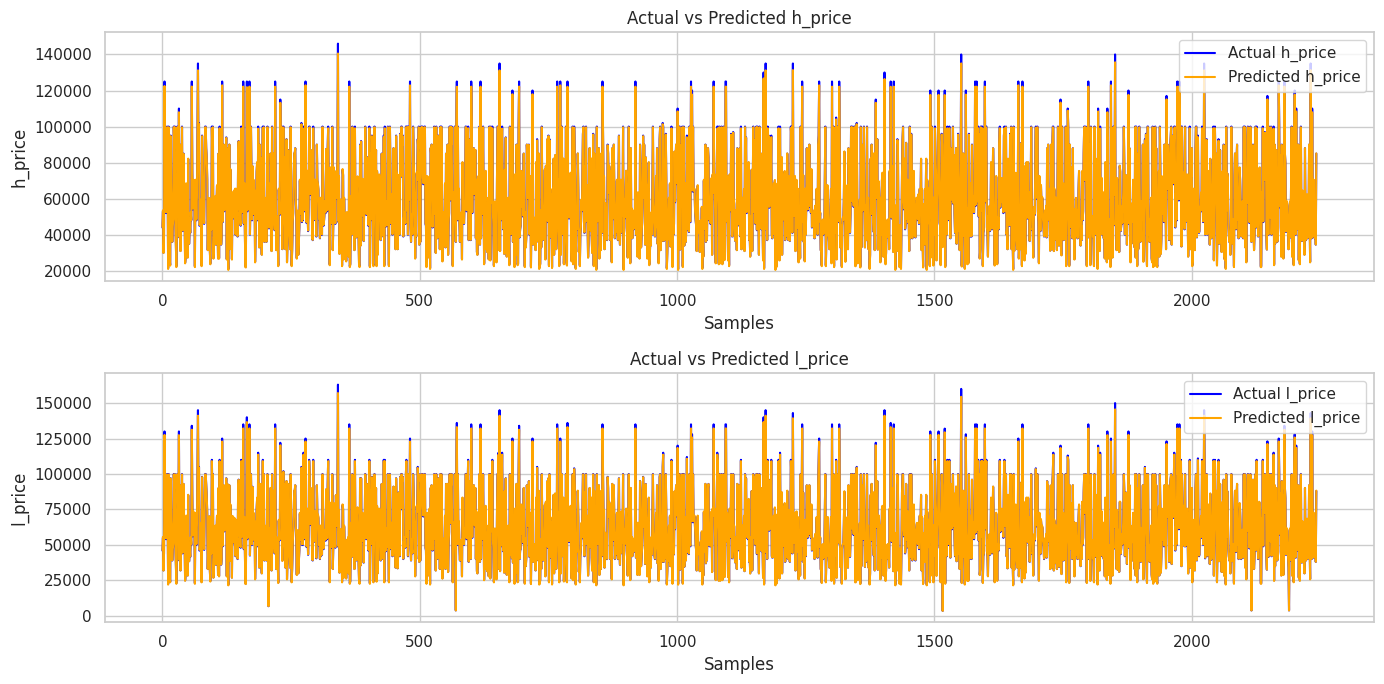

In [60]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Bidirectional
from keras.callbacks import EarlyStopping

# Load the dataset
data = pd.read_csv('me/gw_clean.csv')  # Replace with the correct dataset file path
data = data.dropna()

# Define split parameters
n = len(data)
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

# Shuffle dataset indices
idx = np.arange(n)
np.random.seed(2)
np.random.shuffle(idx)

# Apply shuffled indices to split data
s_train = data.iloc[idx[:n_train]]
s_val = data.iloc[idx[n_train:n_train+n_val]]
s_test = data.iloc[idx[n_train+n_val:]]

# Prepare target (y) and features (X)
# Here, y is multi-output: [h_price, l_price]
y_train = np.log1p(s_train[['h_price', 'l_price']].values)
y_val = np.log1p(s_val[['h_price', 'l_price']].values)
y_test = np.log1p(s_test[['h_price', 'l_price']].values)

# Apply np.log1p to the features 'h_price' and 'l_price'
X_train = np.log1p(s_train[['h_price', 'l_price']].values)
X_val = np.log1p(s_val[['h_price', 'l_price']].values)
X_test = np.log1p(s_test[['h_price', 'l_price']].values)

# Reshape X to fit LSTM input shape (samples, time_steps, features)
time_steps = 1  # Single time step (assuming no time series sequences in data)
X_train = X_train.reshape(X_train.shape[0], time_steps, X_train.shape[1])
X_val = X_val.reshape(X_val.shape[0], time_steps, X_val.shape[1])
X_test = X_test.reshape(X_test.shape[0], time_steps, X_test.shape[1])

# Build the BiLSTM model for multi-output prediction
model = Sequential()
model.add(Bidirectional(LSTM(50, return_sequences=True), input_shape=(X_train.shape[1], X_train.shape[2])))  # Input shape (time_steps, features)
model.add(Bidirectional(LSTM(50)))
model.add(Dense(25, activation='relu'))
model.add(Dense(2))  # Output layer: Predicting two values (h_price and l_price)

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping])

# Predict using the test set
predictions = model.predict(X_test)

# Undo the log transformation for actual values and predictions
predictions = np.expm1(predictions)
y_test = np.expm1(y_test)

# Plot actual vs predicted values for h_price
plt.figure(figsize=(14, 7))
plt.subplot(2, 1, 1)
plt.plot(y_test[:, 0], label='Actual h_price', color='blue')
plt.plot(predictions[:, 0], label='Predicted h_price', color='orange')
plt.title('Actual vs Predicted h_price')
plt.xlabel('Samples')
plt.ylabel('h_price')
plt.legend()

# Plot actual vs predicted values for l_price
plt.subplot(2, 1, 2)
plt.plot(y_test[:, 1], label='Actual l_price', color='blue')
plt.plot(predictions[:, 1], label='Predicted l_price', color='orange')
plt.title('Actual vs Predicted l_price')
plt.xlabel('Samples')
plt.ylabel('l_price')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
# def predict_next_month(model, last_h_price, last_l_price, year, month):
#     """
#     Predicts h_price and l_price for one month ahead.
    
#     Parameters:
#     - model: Trained BiLSTM model
#     - last_h_price: Last known h_price (for the current month)
#     - last_l_price: Last known l_price (for the current month)
#     - year: Current year
#     - month: Current month
    
#     Returns:
#     - Predicted h_price and l_price for the next month
#     """
#     # Adjust the year and month for prediction
#     next_month = month + 1
#     next_year = year
#     if next_month > 12:
#         next_month = 1
#         next_year = year + 1

#     # Prepare the input data for prediction
#     input_data = np.array([[last_h_price, last_l_price, next_year, next_month]])
    
#     # Apply the same log1p transformation used during training
#     input_data = np.log1p(input_data)
    
#     # Reshape to (1, time_steps, features) for LSTM input
#     time_steps = 1  # Single time step
#     input_data = input_data.reshape(1, time_steps, input_data.shape[1])
    
#     # Make the prediction
#     prediction = model.predict(input_data)
    
#     # Apply expm1 to reverse the log1p transformation
#     predicted_values = np.expm1(prediction)
    
#     # Return the predicted h_price and l_price
#     predicted_h_price = predicted_values[0, 0]
#     predicted_l_price = predicted_values[0, 1]
    
#     return predicted_h_price, predicted_l_price

# # Example usage:
# # Assume `model` is your trained BiLSTM model and we want to predict the prices for the next month
# # Provide the last known h_price and l_price, and the current year and month
# predicted_h_price, predicted_l_price = predict_next_month(model, 45000, 47000, 2023, 10)

# print(f"Predicted h_price for next month: {predicted_h_price}")
# print(f"Predicted l_price for next month: {predicted_l_price}")


Epoch 1/100


/home/lillian/Documents/workme/me/mlzoomcamp/.venv/lib/python3.12/site-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


211/211 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 43.1894 - val_loss: 0.1841
Epoch 2/100
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1705 - val_loss: 0.1683
Epoch 3/100
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1564 - val_loss: 0.1386
Epoch 4/100
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1132 - val_loss: 0.0611
Epoch 5/100
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0430 - val_loss: 0.0076
Epoch 6/100
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0040 - val_loss: 0.0036
Epoch 7/100
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0021 - val_loss: 0.0034
Epoch 8/100
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0016 - val_loss: 0.0031
Epoch 9/100
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0012 - val_loss: 0.0029
Epoch 10/100
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0010 - val_loss: 0.0030
Epoch 11/100
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0019 - val_loss: 0.0029
Epoch 12/100
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/ste

Model saved successfully!
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


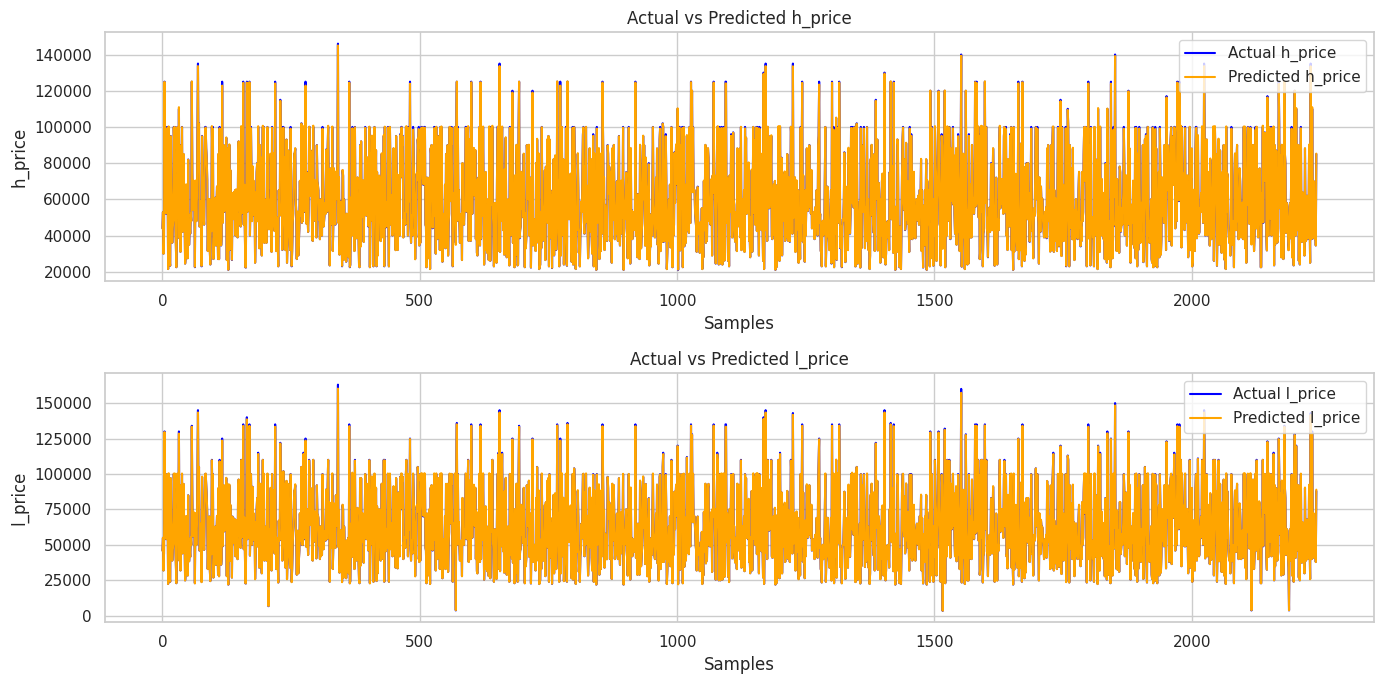

In [61]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Bidirectional
from keras.callbacks import EarlyStopping
from keras.models import load_model

# Load the dataset
data = pd.read_csv('me/gw_clean.csv')  # Replace with the correct dataset file path
data = data.dropna()

# Define split parameters
n = len(data)
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

# Shuffle dataset indices
idx = np.arange(n)
np.random.seed(2)
np.random.shuffle(idx)

# Apply shuffled indices to split data
s_train = data.iloc[idx[:n_train]]
s_val = data.iloc[idx[n_train:n_train+n_val]]
s_test = data.iloc[idx[n_train+n_val:]]

# Prepare target (y) and features (X)
# Here, y is multi-output: [h_price, l_price]
y_train = np.log1p(s_train[['h_price', 'l_price']].values)
y_val = np.log1p(s_val[['h_price', 'l_price']].values)
y_test = np.log1p(s_test[['h_price', 'l_price']].values)

# Select features: h_price, l_price, year, month for training
X_train = np.log1p(s_train[['h_price', 'l_price', 'year', 'month', 'crop_name_encoded']].values)
X_val = np.log1p(s_val[['h_price', 'l_price', 'year', 'month', 'crop_name_encoded']].values)
X_test = np.log1p(s_test[['h_price', 'l_price', 'year', 'month', 'crop_name_encoded']].values)

# Reshape X to fit LSTM input shape (samples, time_steps, features)
time_steps = 1  # Single time step (since we are doing one-month ahead predictions)
X_train = X_train.reshape(X_train.shape[0], time_steps, X_train.shape[1])
X_val = X_val.reshape(X_val.shape[0], time_steps, X_val.shape[1])
X_test = X_test.reshape(X_test.shape[0], time_steps, X_test.shape[1])

# Build the BiLSTM model for multi-output prediction
model = Sequential()
model.add(Bidirectional(LSTM(50, return_sequences=True), input_shape=(X_train.shape[1], X_train.shape[2])))  # Input shape (time_steps, features)
model.add(Bidirectional(LSTM(50)))
model.add(Dense(25, activation='relu'))
model.add(Dense(2))  # Output layer: Predicting two values (h_price and l_price)

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping])

# Save the trained model to a file
model.save('gw_year_month_crop_name_encoded_h_l_price_prediction_model.h5')
print("Model saved successfully!")

# Predict using the test set
predictions = model.predict(X_test)

# Undo the log transformation for actual values and predictions
predictions = np.expm1(predictions)
y_test = np.expm1(y_test)

# Plot actual vs predicted values for h_price
plt.figure(figsize=(14, 7))
plt.subplot(2, 1, 1)
plt.plot(y_test[:, 0], label='Actual h_price', color='blue')
plt.plot(predictions[:, 0], label='Predicted h_price', color='orange')
plt.title('Actual vs Predicted h_price')
plt.xlabel('Samples')
plt.ylabel('h_price')
plt.legend()

# Plot actual vs predicted values for l_price
plt.subplot(2, 1, 2)
plt.plot(y_test[:, 1], label='Actual l_price', color='blue')
plt.plot(predictions[:, 1], label='Predicted l_price', color='orange')
plt.title('Actual vs Predicted l_price')
plt.xlabel('Samples')
plt.ylabel('l_price')
plt.legend()

plt.tight_layout()
plt.show()


In [63]:
# Import necessary libraries
import numpy as np
from keras.models import load_model

# Load the trained model from .h5 file
model = load_model('gw_year_month_crop_name_encoded_h_l_price_prediction_model.h5')

# Prediction function for h_price and l_price for the next month
def predict_next_month(year, month, h_price_last, l_price_last, corp_name_encoded, model):
    """
    Predict the next month's h_price and l_price using the trained model.
    
    :param year: int, year value for the prediction
    :param month: int, month value for the prediction
    :param h_price_last: float, last known h_price value (for the current month)
    :param l_price_last: float, last known l_price value (for the current month)
    :param corp_name_encoded: float, encoded value for the corporation name
    :param model: trained BiLSTM model
    
    :return: predicted h_price, l_price for the next month
    """
    
    # Increment the month by 1 (and handle year rollover if month exceeds 12)
    next_month = month + 1
    next_year = year
    if next_month > 12:
        next_month = 1
        next_year += 1
    
    # Prepare input data for the model (h_price, l_price, year, month, corp_name_encoded)
    input_data = np.array([[h_price_last, l_price_last, next_year, next_month, corp_name_encoded]])
    
    # Apply log1p transformation to input data
    input_data = np.log1p(input_data)
    
    # Reshape the input to match LSTM expected input (samples, time_steps, features)
    input_data = input_data.reshape(1, 1, input_data.shape[1])  # (1 sample, 1 time step, 5 features)
    
    # Make the prediction using the trained model
    predicted_prices_log = model.predict(input_data)
    
    # Undo the log1p transformation to get actual predicted values
    predicted_prices = np.expm1(predicted_prices_log)
    
    # Extract predicted h_price and l_price
    predicted_h_price = predicted_prices[0, 0]
    predicted_l_price = predicted_prices[0, 1]
    
    return predicted_h_price, predicted_l_price

# Example usage of the prediction function
# Assume the last known h_price and l_price values for current month and corp_name_encoded
last_h_price = 100000 #s_train['h_price'].values[-1]  # Replace with actual last h_price from your dataset
last_l_price = 110000 #s_train['l_price'].values[-1]  # Replace with actual last l_price from your dataset
last_corp_name_encoded = 2 # s_train['corp_name_encoded'].values[-1]  # Replace with actual encoded corp_name

# Let's predict h_price and l_price for the next month (e.g., January 2024)
predicted_h_price, predicted_l_price = predict_next_month(2024, 2, last_h_price, last_l_price, 2, model)

print(f"Predicted h_price for 2024-01: {predicted_h_price}")
print(f"Predicted l_price for 2024-01: {predicted_l_price}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 590ms/step
Predicted h_price for 2024-01: 100641.03125
Predicted l_price for 2024-01: 109940.5546875


In [62]:
data[(data['year'] == 2024) & (data['month'] == 3) & (data['crop_name_encoded'] == 2)]

,id,h_price,l_price,crop_name_encoded,market_name_encoded,year,month,day
8995,662151,100000,110000,2,1,2024,3,5
10290,660463,100000,110000,2,1,2024,3,1
10300,660737,100000,110000,2,1,2024,3,1
10304,660741,100000,110000,2,1,2024,3,1
10320,660181,100000,110000,2,1,2024,3,1
10330,661871,100000,110000,2,1,2024,3,4
10340,662429,100000,110000,2,1,2024,3,6
10350,662707,100000,110000,2,1,2024,3,6
10360,662984,100000,110000,2,1,2024,3,7
10370,663815,100000,110000,2,1,2024,3,8


In [ ]:
#Metrics in percentage

/home/lillian/Documents/workme/me/mlzoomcamp/.venv/lib/python3.12/site-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
211/211 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 54.0309 - val_loss: 0.1681
Epoch 2/100
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1646 - val_loss: 0.1646
Epoch 3/100
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1589 - val_loss: 0.1600
Epoch 4/100
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1544 - val_loss: 0.1469
Epoch 5/100
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1359 - val_loss: 0.1157
Epoch 6/100
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1023 - val_loss: 0.0575
Epoch 7/100
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0406 - val_loss: 0.0159
Epoch 8/100
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0060 - val_loss: 0.0035
Epoch 9/100
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0016 - val_loss: 0.0041
Epoch 10/100
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0021 - val_loss: 0.0032
Epoch 11/100
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0015 - val_loss: 0.0038
Epoch 12/100
211/211 ━━━━━━━━━━━━━━━━━━━

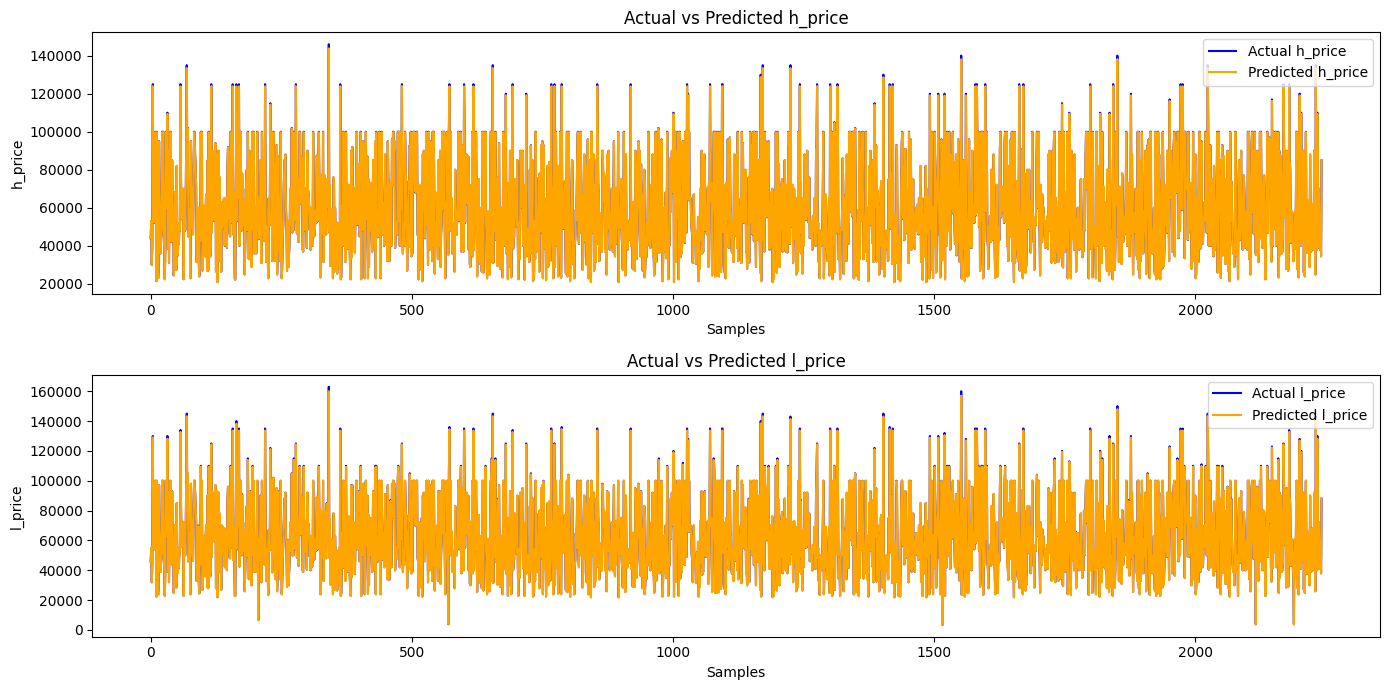

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Bidirectional
from keras.callbacks import EarlyStopping
from sklearn.metrics import r2_score

# Load the dataset
data = pd.read_csv('me/gw_clean.csv')  # Replace with the correct dataset file path
data = data.dropna()

# Define split parameters
n = len(data)
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

# Shuffle dataset indices
idx = np.arange(n)
np.random.seed(2)
np.random.shuffle(idx)

# Apply shuffled indices to split data
s_train = data.iloc[idx[:n_train]]
s_val = data.iloc[idx[n_train:n_train+n_val]]
s_test = data.iloc[idx[n_train+n_val:]]

# Prepare target (y) and features (X)
# Here, y is multi-output: [h_price, l_price]
y_train = np.log1p(s_train[['h_price', 'l_price']].values)
y_val = np.log1p(s_val[['h_price', 'l_price']].values)
y_test = np.log1p(s_test[['h_price', 'l_price']].values)

# Apply np.log1p to the features 'h_price' and 'l_price'
X_train = np.log1p(s_train[['h_price', 'l_price']].values)
X_val = np.log1p(s_val[['h_price', 'l_price']].values)
X_test = np.log1p(s_test[['h_price', 'l_price']].values)

# Reshape X to fit LSTM input shape (samples, time_steps, features)
time_steps = 1  # Single time step (assuming no time series sequences in data)
X_train = X_train.reshape(X_train.shape[0], time_steps, X_train.shape[1])
X_val = X_val.reshape(X_val.shape[0], time_steps, X_val.shape[1])
X_test = X_test.reshape(X_test.shape[0], time_steps, X_test.shape[1])

# Build the BiLSTM model for multi-output prediction
model = Sequential()
model.add(Bidirectional(LSTM(50, return_sequences=True), input_shape=(X_train.shape[1], X_train.shape[2])))  # Input shape (time_steps, features)
model.add(Bidirectional(LSTM(50)))
model.add(Dense(25, activation='relu'))
model.add(Dense(2))  # Output layer: Predicting two values (h_price and l_price)

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping])

# Predict using the test set
predictions = model.predict(X_test)

# Undo the log transformation for actual values and predictions
predictions = np.expm1(predictions)
y_test = np.expm1(y_test)

# Function to calculate MAPE
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Function to calculate MAE
def mae(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

# Function to calculate RMSPE
def rmspe(y_true, y_pred):
    return np.sqrt(np.mean(((y_true - y_pred) / y_true) ** 2)) * 100

# Calculate accuracy metrics for h_price and l_price
metrics = {}
for i, price_type in enumerate(['h_price', 'l_price']):
    print(f"\nAccuracy metrics for {price_type}:")
    metrics[price_type] = {}
    
    # Calculate MAPE
    mape_value = mape(y_test[:, i], predictions[:, i])
    print(f"MAPE: {mape_value:.2f}%")
    metrics[price_type]['MAPE'] = mape_value
    
    # Calculate MAE and MAE in percentage
    mae_value = mae(y_test[:, i], predictions[:, i])
    mae_pct = (mae_value / np.mean(y_test[:, i])) * 100
    print(f"MAE: {mae_value:.2f}, MAE (%): {mae_pct:.2f}%")
    metrics[price_type]['MAE'] = mae_value
    metrics[price_type]['MAE (%)'] = mae_pct
    
    # Calculate RMSPE
    rmspe_value = rmspe(y_test[:, i], predictions[:, i])
    print(f"RMSPE: {rmspe_value:.2f}%")
    metrics[price_type]['RMSPE'] = rmspe_value
    
    # Calculate R-squared
    r2_value = r2_score(y_test[:, i], predictions[:, i])
    r2_pct = r2_value * 100
    print(f"R-squared: {r2_value:.2f}, R-squared (%): {r2_pct:.2f}%")
    metrics[price_type]['R-squared'] = r2_value
    metrics[price_type]['R-squared (%)'] = r2_pct

# Plot actual vs predicted values for h_price
plt.figure(figsize=(14, 7))
plt.subplot(2, 1, 1)
plt.plot(y_test[:, 0], label='Actual h_price', color='blue')
plt.plot(predictions[:, 0], label='Predicted h_price', color='orange')
plt.title('Actual vs Predicted h_price')
plt.xlabel('Samples')
plt.ylabel('h_price')
plt.legend()

# Plot actual vs predicted values for l_price
plt.subplot(2, 1, 2)
plt.plot(y_test[:, 1], label='Actual l_price', color='blue')
plt.plot(predictions[:, 1], label='Predicted l_price', color='orange')
plt.title('Actual vs Predicted l_price')
plt.xlabel('Samples')
plt.ylabel('l_price')
plt.legend()

plt.tight_layout()
plt.show()


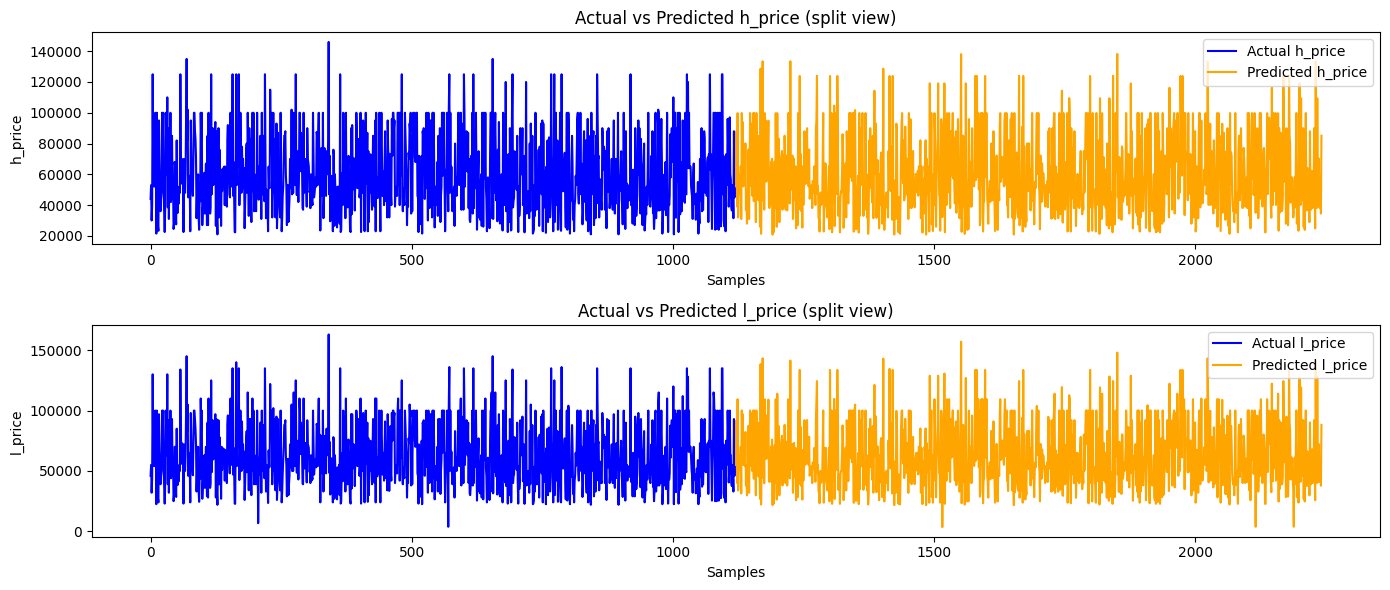

In [8]:
# Calculate the midpoint to split actual and predicted values
midpoint = len(y_test) // 2

# Create arrays with NaNs to separate actual and predicted parts in the plot
h_price_actual = np.concatenate([y_test[:midpoint, 0], [np.nan] * (len(y_test) - midpoint)])
h_price_predicted = np.concatenate([[np.nan] * midpoint, predictions[midpoint:, 0]])

l_price_actual = np.concatenate([y_test[:midpoint, 1], [np.nan] * (len(y_test) - midpoint)])
l_price_predicted = np.concatenate([[np.nan] * midpoint, predictions[midpoint:, 1]])

# Plot actual and predicted values with split on x-axis
plt.figure(figsize=(14, 6))

# Plot h_price
plt.subplot(2, 1, 1)
plt.plot(h_price_actual, label='Actual h_price', color='blue')
plt.plot(h_price_predicted, label='Predicted h_price', color='orange')
plt.title('Actual vs Predicted h_price (split view)')
plt.xlabel('Samples')
plt.ylabel('h_price')
plt.legend()

# Plot l_price
plt.subplot(2, 1, 2)
plt.plot(l_price_actual, label='Actual l_price', color='blue')
plt.plot(l_price_predicted, label='Predicted l_price', color='orange')
plt.title('Actual vs Predicted l_price (split view)')
plt.xlabel('Samples')
plt.ylabel('l_price')
plt.legend()

plt.tight_layout()
plt.show()


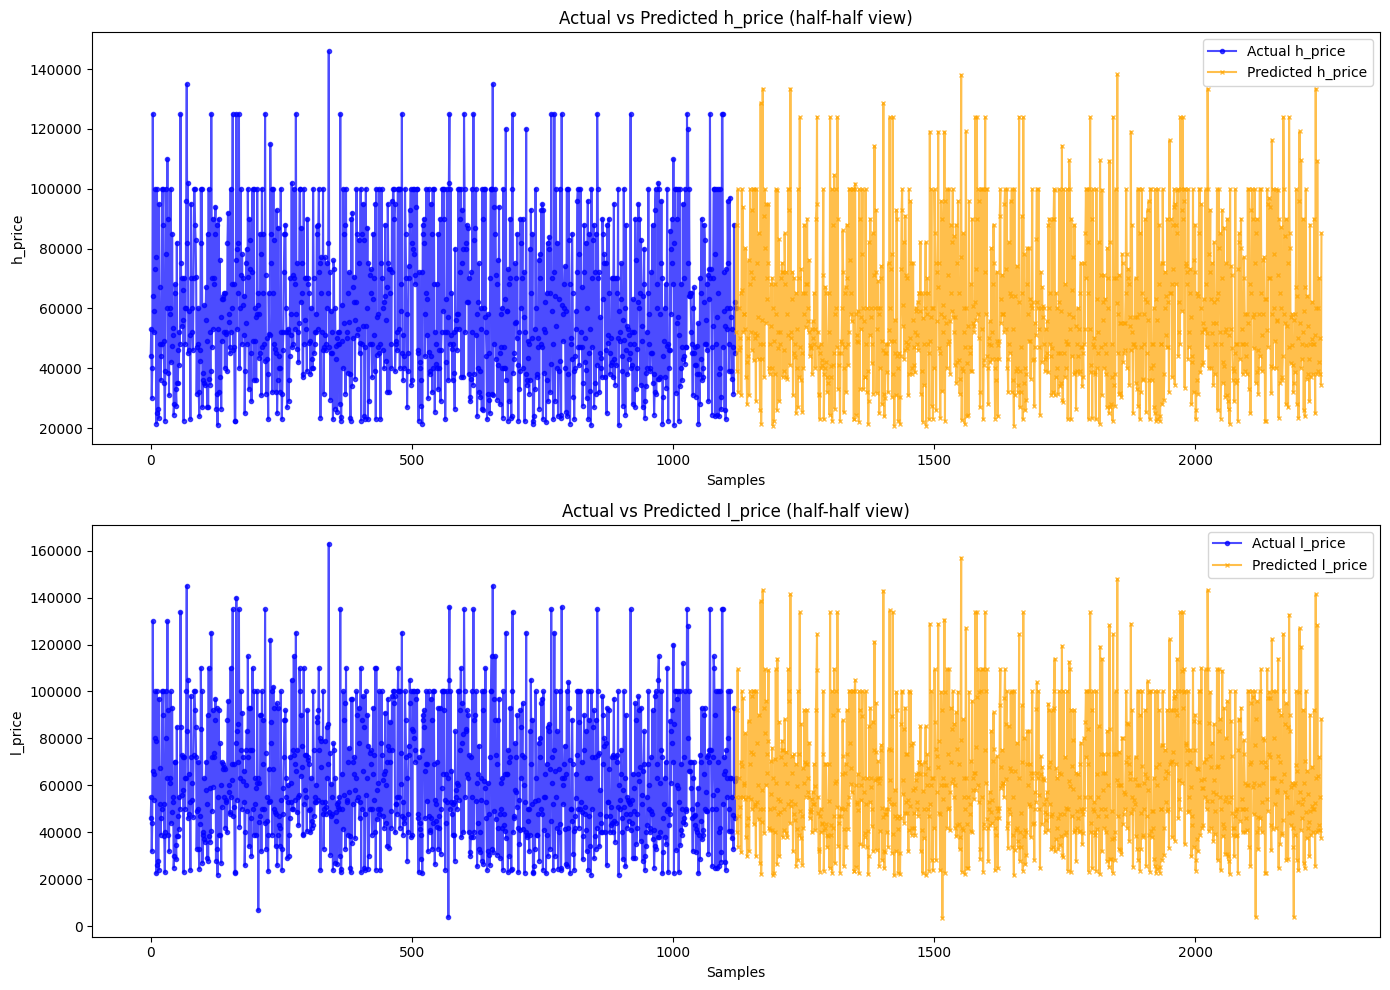

In [9]:
# Define a larger figure size for clarity
plt.figure(figsize=(14, 10))

# Adjust the midpoint to split actual and predicted values
midpoint = len(y_test) // 2

# Plot for h_price
plt.subplot(2, 1, 1)
plt.plot(y_test[:midpoint, 0], label='Actual h_price', color='blue', marker='o', markersize=3, alpha=0.7)
plt.plot(range(midpoint, len(y_test)), predictions[midpoint:, 0], label='Predicted h_price', color='orange', marker='x', markersize=3, alpha=0.7)
plt.title('Actual vs Predicted h_price (half-half view)')
plt.xlabel('Samples')
plt.ylabel('h_price')
plt.legend()

# Plot for l_price
plt.subplot(2, 1, 2)
plt.plot(y_test[:midpoint, 1], label='Actual l_price', color='blue', marker='o', markersize=3, alpha=0.7)
plt.plot(range(midpoint, len(y_test)), predictions[midpoint:, 1], label='Predicted l_price', color='orange', marker='x', markersize=3, alpha=0.7)
plt.title('Actual vs Predicted l_price (half-half view)')
plt.xlabel('Samples')
plt.ylabel('l_price')
plt.legend()

plt.tight_layout()
plt.show()


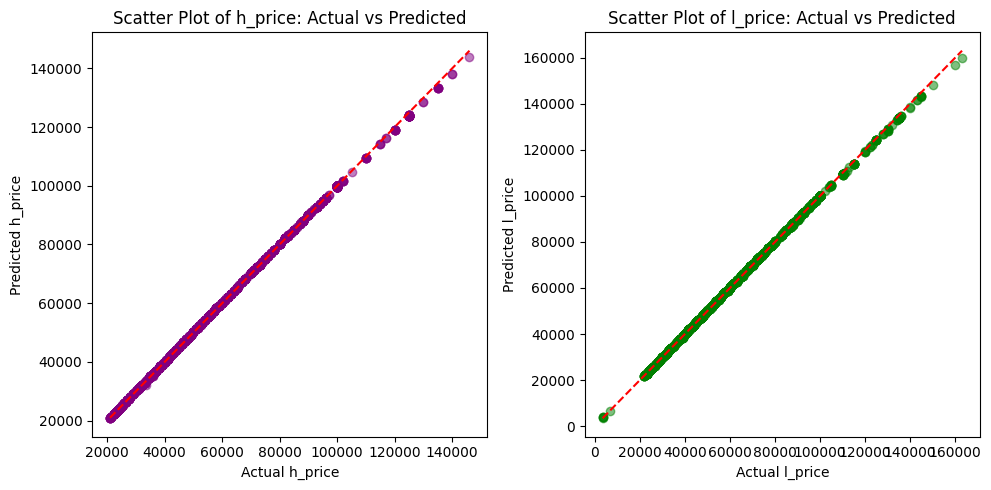

In [10]:
plt.figure(figsize=(10, 5))

# Scatter plot for h_price
plt.subplot(1, 2, 1)
plt.scatter(y_test[:, 0], predictions[:, 0], alpha=0.5, color='purple')
plt.plot([y_test[:, 0].min(), y_test[:, 0].max()], [y_test[:, 0].min(), y_test[:, 0].max()], 'r--')  # Line y=x for reference
plt.title("Scatter Plot of h_price: Actual vs Predicted")
plt.xlabel("Actual h_price")
plt.ylabel("Predicted h_price")

# Scatter plot for l_price
plt.subplot(1, 2, 2)
plt.scatter(y_test[:, 1], predictions[:, 1], alpha=0.5, color='green')
plt.plot([y_test[:, 1].min(), y_test[:, 1].max()], [y_test[:, 1].min(), y_test[:, 1].max()], 'r--')  # Line y=x for reference
plt.title("Scatter Plot of l_price: Actual vs Predicted")
plt.xlabel("Actual l_price")
plt.ylabel("Predicted l_price")

plt.tight_layout()
plt.show()


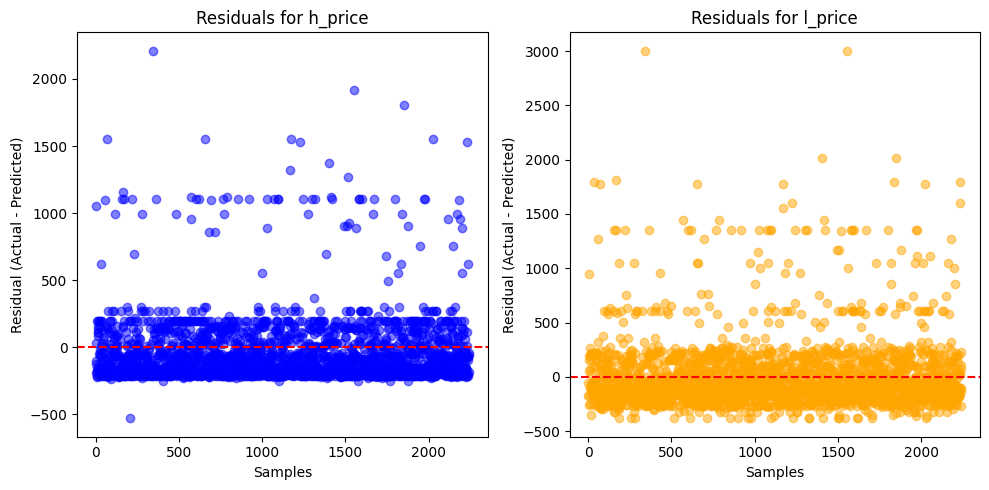

In [11]:
# Calculate residuals
residuals_h = y_test[:, 0] - predictions[:, 0]
residuals_l = y_test[:, 1] - predictions[:, 1]

plt.figure(figsize=(10, 5))

# Residuals for h_price
plt.subplot(1, 2, 1)
plt.scatter(range(len(residuals_h)), residuals_h, alpha=0.5, color='blue')
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuals for h_price")
plt.xlabel("Samples")
plt.ylabel("Residual (Actual - Predicted)")

# Residuals for l_price
plt.subplot(1, 2, 2)
plt.scatter(range(len(residuals_l)), residuals_l, alpha=0.5, color='orange')
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuals for l_price")
plt.xlabel("Samples")
plt.ylabel("Residual (Actual - Predicted)")

plt.tight_layout()
plt.show()


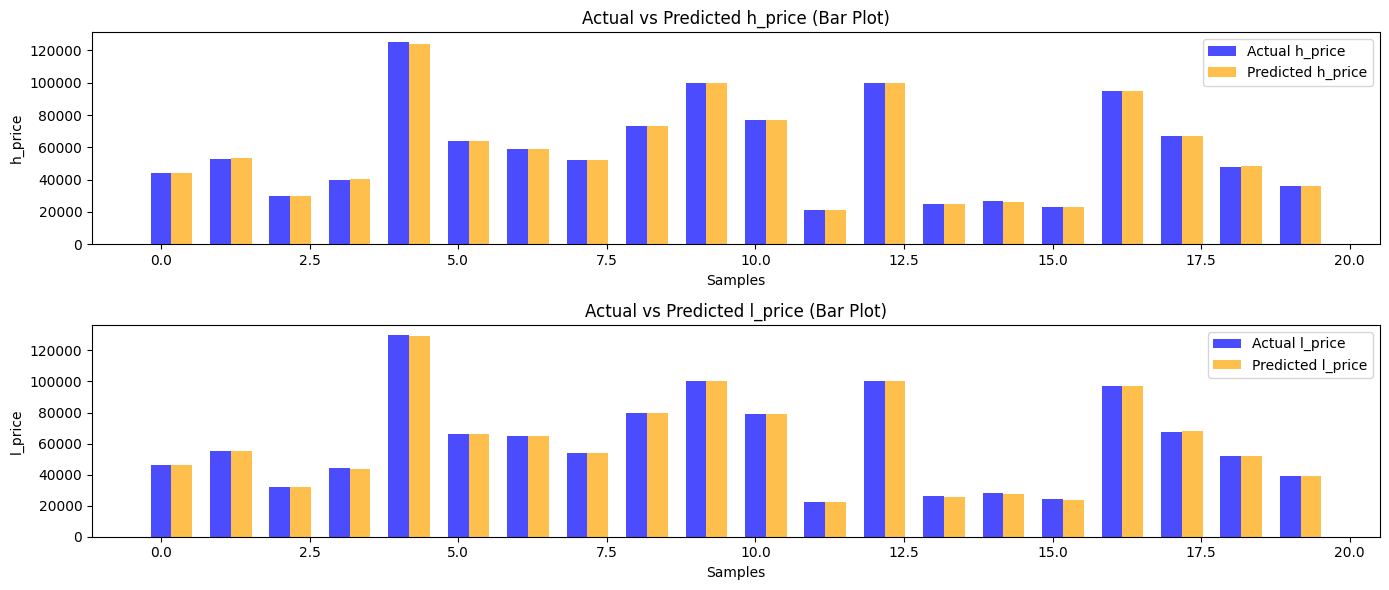

In [13]:
# Select a small subset to plot as bar chart for better readability
subset_size = 20
y_test_subset = y_test[:subset_size]
predictions_subset = predictions[:subset_size]

# Bar plot for h_price
plt.figure(figsize=(14, 6))

plt.subplot(2, 1, 1)
index = np.arange(subset_size)
bar_width = 0.35

plt.bar(index, y_test_subset[:, 0], bar_width, label="Actual h_price", color='blue', alpha=0.7)
plt.bar(index + bar_width, predictions_subset[:, 0], bar_width, label="Predicted h_price", color='orange', alpha=0.7)
plt.xlabel("Samples")
plt.ylabel("h_price")
plt.title("Actual vs Predicted h_price (Bar Plot)")
plt.legend()

# Bar plot for l_price
plt.subplot(2, 1, 2)
plt.bar(index, y_test_subset[:, 1], bar_width, label="Actual l_price", color='blue', alpha=0.7)
plt.bar(index + bar_width, predictions_subset[:, 1], bar_width, label="Predicted l_price", color='orange', alpha=0.7)
plt.xlabel("Samples")
plt.ylabel("l_price")
plt.title("Actual vs Predicted l_price (Bar Plot)")
plt.legend()

plt.tight_layout()
plt.show()
